 ## Task 1: Data Preprocessing & Cleaning (Titanic Dataset)

#import necessary libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv("titanic.csv")


In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.shape

(891, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

#Handling missing Data

In [30]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [31]:
df.duplicated().sum()

np.int64(0)

<Axes: >

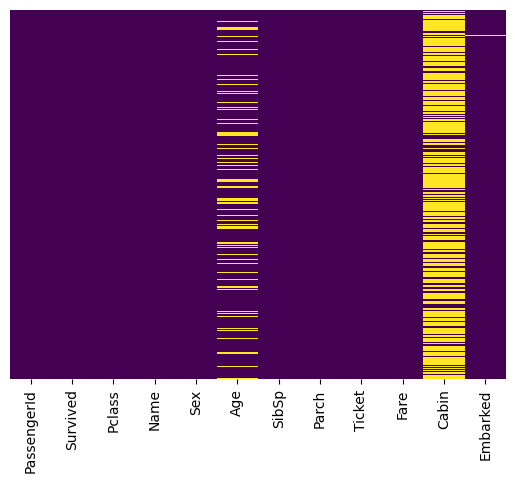

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-33-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [34]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-35-3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [36]:
# Drop 'Cabin' (too many missing values)
df.drop(columns='Cabin', inplace=True)

 Drop Irrelevant Columns

In [37]:
# These columns don’t help with prediction
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [38]:
df.shape

(891, 8)

##Encode Categorical Features

In [40]:
df = pd.get_dummies(df, columns=['Sex','Embarked', 'Pclass'], drop_first=True).astype(int)

In [41]:
df

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22,1,0,7,1,0,1,0,1
1,1,38,1,0,71,0,0,0,0,0
2,1,26,0,0,7,0,0,1,0,1
3,1,35,1,0,53,0,0,1,0,0
4,0,35,0,0,8,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,13,1,0,1,1,0
887,1,19,0,0,30,0,0,1,0,0
888,0,29,1,2,23,0,0,1,0,1
889,1,26,0,0,30,1,0,0,0,0


#Normalizing numerical columns for consistency

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
num_cols=['Age','Fare']
df[num_cols]=scaler.fit_transform(df[num_cols])

In [45]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,-0.580044,1,0,-0.498948,1,0,1,0,1
1,1,0.650112,1,0,0.789405,0,0,0,0,0
2,1,-0.272505,0,0,-0.498948,0,0,1,0,1
3,1,0.419458,1,0,0.427056,0,0,1,0,0
4,0,0.419458,0,0,-0.478817,1,0,1,0,1


#Identification and removed outliers using the IQR method

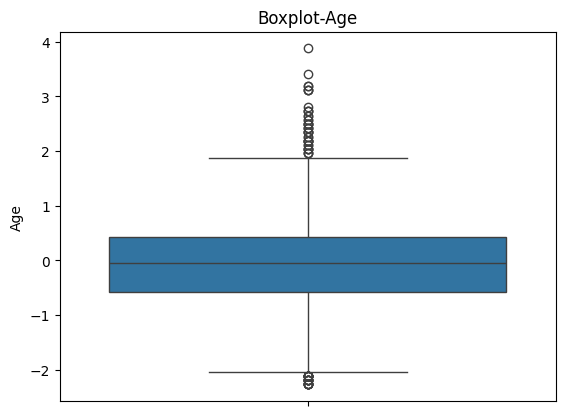

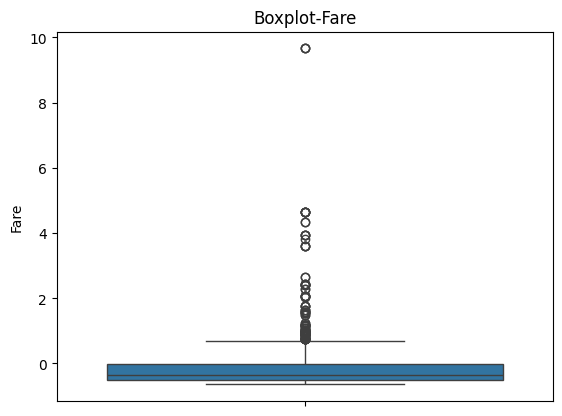

In [51]:
for col in num_cols:
  plt.figure()
  sns.boxplot(df[col])
  plt.title(f"Boxplot-{col}")
  plt.show()


In [52]:
# Remove outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

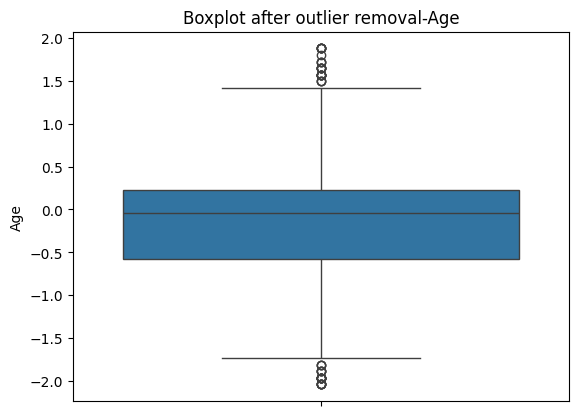

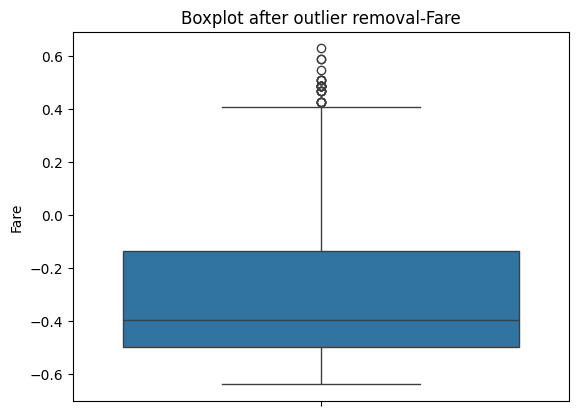

In [53]:
for col in num_cols:
  plt.figure()
  sns.boxplot(df[col])
  plt.title(f"Boxplot after outlier removal-{col}")
  plt.show()


# Correlation between features

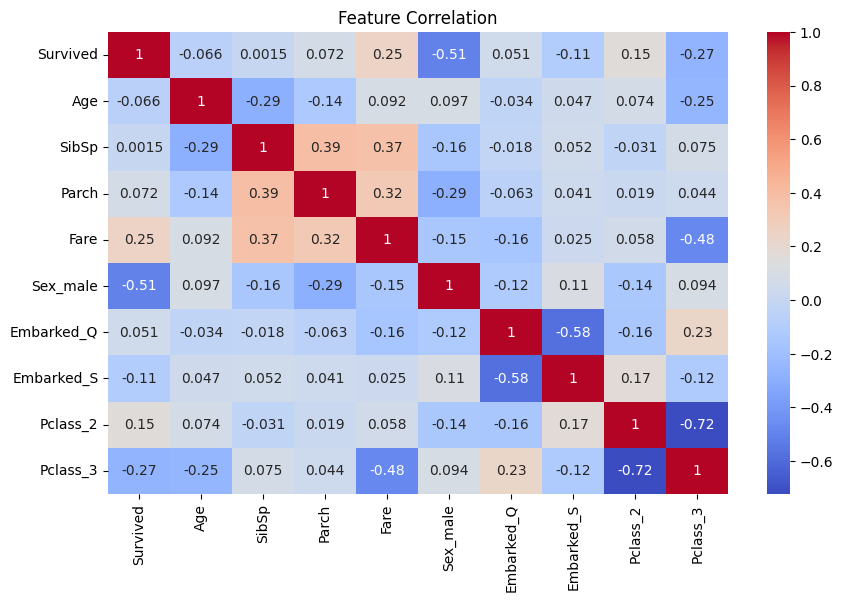

In [54]:
#visualize corrleations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

##  Conclusion

In this task, we successfully cleaned and preprocessed the Titanic dataset in preparation for machine learning.

- Handled missing values using appropriate strategies (mean, median, mode)
- Converted categorical features to numerical using label and one-hot encoding
- Normalized numerical columns for consistency
- Identified and removed outliers using the IQR method
- Dropped irrelevant features that do not contribute to prediction

This cleaned dataset is now ready for building machine learning models like classification (e.g., predicting survival). The quality of this preprocessing step directly impacts model accuracy and performance.
